In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at /media/me/DATA/Dropbox/31_Projekte/01_Python/libs
Start Time: 22:31:24


time: 581 ms


# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Plot with seaborn without configuration.
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `specials`: Returns rows representing all special values per column.
* `sample`: Returns some sample rows: beginning + end + specials + random rows.
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale.
* `memory_consumption`: Returns the memory consumption of Python objects.

In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy
import pandasklar as pak 

grid = pak.grid

time: 2.08 s


## plot(): Plot with seaborn without configuration

In [3]:
?pak.plot

time: 84.5 ms


Signature:
pak.plot(
    df1,
    df2=None,
    x='--',
    size=(16, 4),
    palette=('rainbow', 'tab10'),
    line=(1, 1),
    inaccurate_limit=10000,
)
Docstring:
Plots DataFrames or Series.
* df1, df2:         The first two parameters are DataFrames or Series. 
                    If there are two, they get separate y-axes.
* x:                Which column contains the x-axis? 
                    x=='index' -> The index is used as x.    
                    If no x is given, x is tried to be guessed. 
                    If no suitable column is found, the index is used as x.
                    A column is considered suitable if it is called 'x', 'X' or 'index'.
* size:             Width and height of the plot as tuples
* palette:          The two palettes as tuple or sting
* line:             The line thickness as tuple or number    
* inaccurate_limit: From what size should the data be thinned randomly.
                    Uses pandasklars sample function, so minimums and maxim

In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g) )
pak.sample(df)

,A,B,C,D,E,F,G
0,0.000000,0.000000,1.000000,0,0.000000,0.000000,0.000000
35,0.537300,0.585147,0.705427,0,-1.000000,0.272142,0.746648
41,0.539266,0.663165,0.704922,0,-0.924138,1.000000,0.794289
66,0.555836,0.730128,0.682392,0,-0.348200,0.437518,1.000000
72,0.575683,0.731516,0.678107,0,-0.526704,-0.827861,0.462180
88,0.736814,0.828204,0.266720,0,-0.682953,0.183649,-0.875939
99,1.000000,1.000000,0.000000,0,-0.072650,-0.190556,0.014762


time: 249 ms


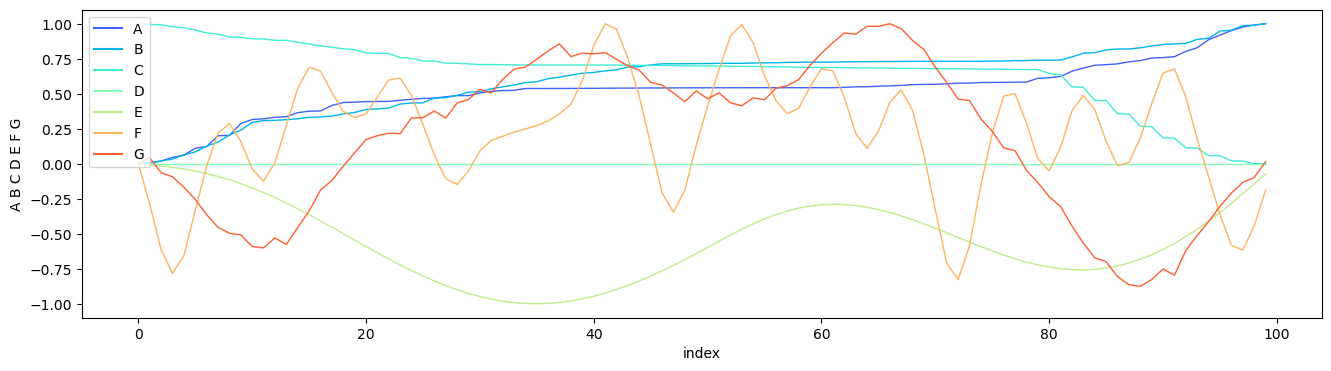

time: 939 ms


In [8]:
# just plot all together
%matplotlib inline
pak.plot(df)

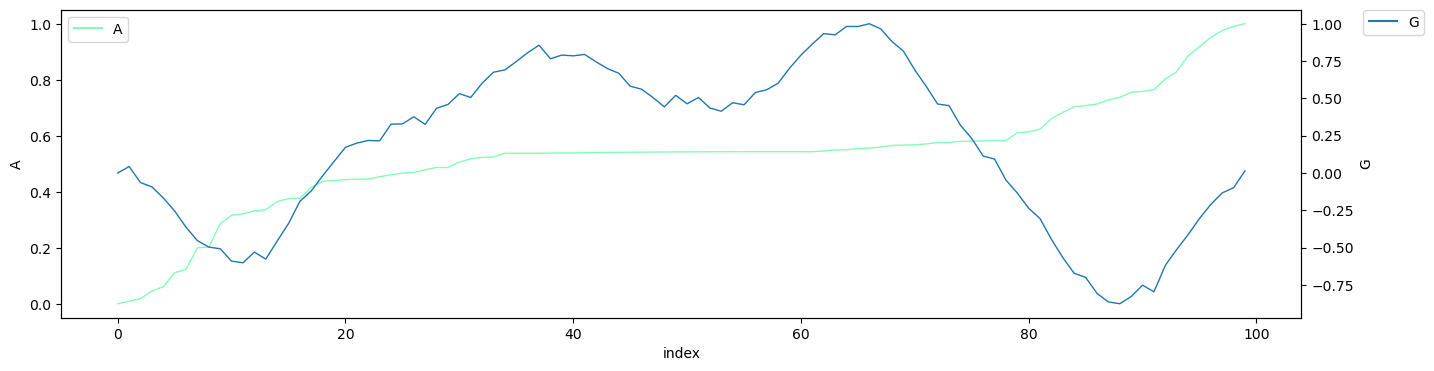

time: 599 ms


In [9]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

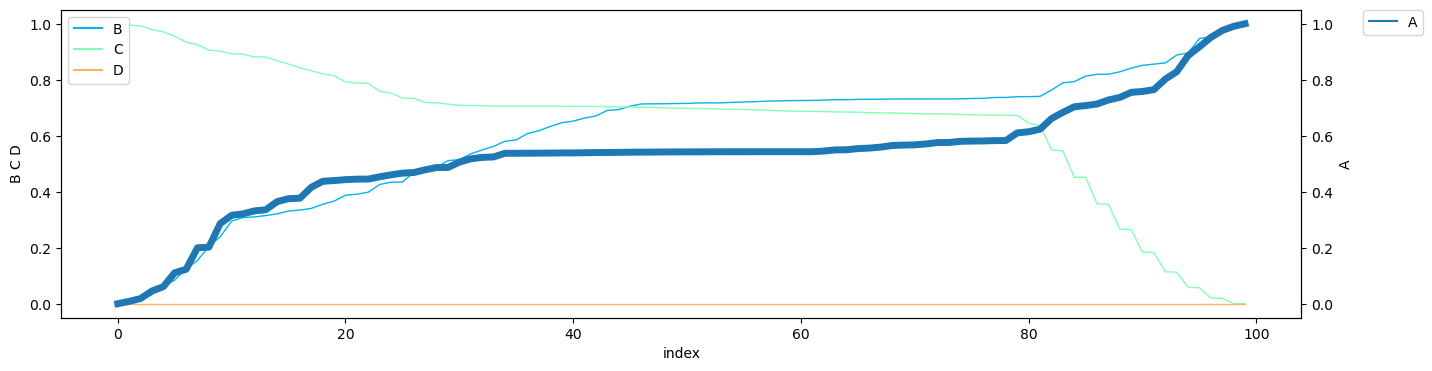

time: 657 ms


In [10]:
# plot DataFrame + Series, use different line thickness
%matplotlib inline 
pak.plot(df[list('BCD')], df.A, line=(1,5))

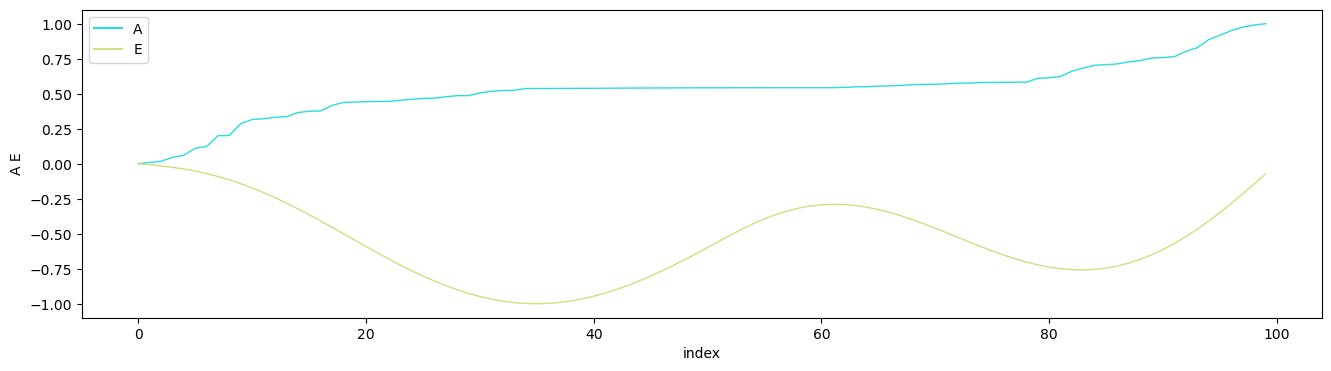

time: 706 ms


In [11]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

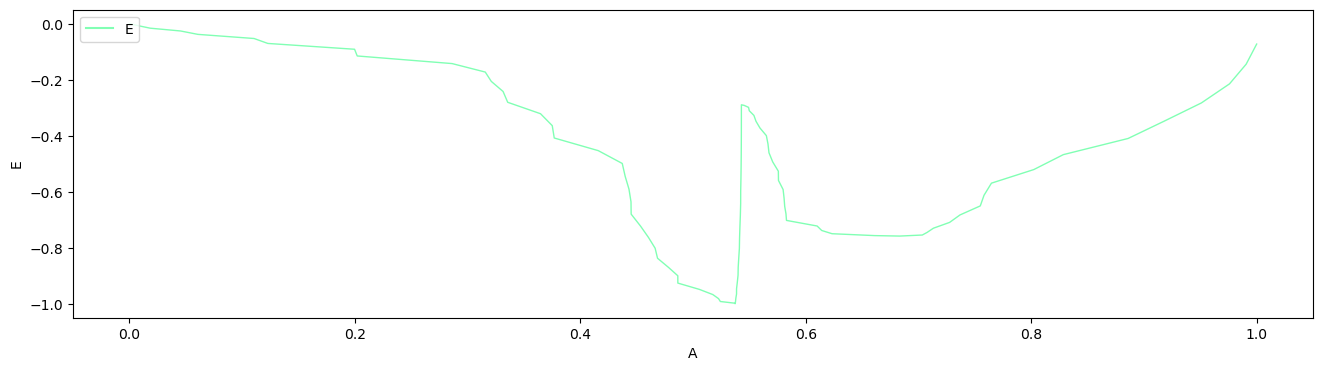

time: 332 ms


In [12]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## specials(): Rows representing all special values per column

In [13]:
?pak.specials

time: 48.8 ms


Signature:
pak.specials(
    df,
    find=['head', 'first', 'min', 'most', 'max', 'nan', 'last', 'tail'],
    indicator=None,
    sort='index',
)
Docstring:
Returns rows representing all special values per column.
The resulting dataframe has the same minimums and maximums per column as the input dataframe, 
and if a column in the input contains NaNs the result will contain NaNs as well.
* find: List of what values are searched. 
  Possible values: 'head','first','min','most','max','nan','last','tail'
* indicator: Show additional column with a note, why the row is in the result
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [14]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))

time: 1.04 s


In [15]:
a = pak.specials(df6, indicator='n')
a

,first_name,age,age_class,postal_code,birthplace,secret,features,history,n
0,Mara,36,30,84842,<NA>,Ysqzu1uQK,"{n, u, D, l, C}","[A, C, C, B]",head secret_first postal_code_first first_name...
102,Adolf,32,30,<NA>,<NA>,fZQ9w,"{B, x, R, m}","[A, x]",postal_code_nan first_name_min age_class_first...
119,Astrid,20,20,45530,Berlin,eN37nw,"{2, 5, G, w, e}","[c, b, a]",age_min age_class_min age_class_last birthplac...
142,Zoe,25,20,31542,<NA>,vnSlJjB,"{S, 2, l, m}","[A, A, A]",first_name_max age_class_min age_class_last bi...
199,Meike,33,30,71471,<NA>,UqAYJa,"{o, 5, m, D, c}","[b, b, a, b]",first_name_most age_class_first age_class_most...
301,Gerhard,42,40,76157,Bremen,GO821P,"{R, 2, j, v}","[c, b, a]",age_max age_class_max birthplace_max
1923,Michaela,32,30,45127,Bremen,Eiqöuwc,"{x, M, o, 5}",[],postal_code_most age_class_first age_class_mos...
2212,Niclas,34,30,99997,Bremen,aX4byOk,"{u, 1, E}","[c, b, a]",postal_code_max age_class_first age_class_most...
3219,Ruth,34,30,10002,Bremen,pexrO,{A},"[A, x]",postal_code_min age_class_first age_class_most...
6783,Günter,34,30,42216,Bremen,kmetxÜ8eA,"{f, v}",[],features_most


time: 290 ms


## sample(): Returns some sample rows

In [16]:
?pak.sample

time: 30.4 ms


Signature: pak.sample(df, size=None)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus the other specials() --see there--,
plus some random rows.
* size: Number of rows to return. If size=None, all specials() are returned.
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [22]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))
df = df4

time: 972 ms


In [18]:
pak.sample(df6,15)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Stephanie,21,20,<NA>,<NA>,TJahöÖgGu,"{Y, N}","[A, x]"
1,Christoph,35,30,30644,Berlin,nZkyI,"{m, y, u, d, O}","[c, b, a]"
130,Lucas,42,40,23149,<NA>,aZhxyPwQaY,"{B, F, S, p, J}",[]
166,Johann,20,20,47056,Bremen,vluifcQ4m,"{x, i, K}","[A, A, A]"
211,Zoe,30,30,43533,Berlin,ZMhrü,"{x, O, i, Q, N}","[A, B, C, C]"
416,Adolf,35,30,52007,<NA>,wwRVr2NRPG,"{O, f, e}","[A, B, C]"
420,Bettina,33,30,54114,Bremen,JrAZ86ayV,"{f, s, N}","[A, x]"
578,Anette,28,20,91641,Bremen,9Zaidio,"{I, y, o, g}","[A, A, A]"
2481,Jonas,29,20,29359,Bremen,Rpkk4,"{x, 0, X, V}","[c, b, a]"
4226,Marcus,29,20,10014,Berlin,S5axcuPZFY,"{k, l}","[A, B, C]"


time: 459 ms


In [19]:
pak.sample(df3,1005)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Stephanie,21,20,<NA>,<NA>,TJahöÖgGu,"{Y, N}","[A, x]"
1,Christoph,35,30,30644,Berlin,nZkyI,"{m, y, u, d, O}","[c, b, a]"
2,Fabian,30,30,96305,<NA>,OoaeWöysIQ,"{K, f, 1, v}","[a, b, c]"
3,Leoni,41,40,82620,<NA>,Su5LsÜÄ,"{k, Y, e}","[A, A, A]"
4,Helene,36,30,65951,Bremen,IbrJ2L,"{2, o}","[b, b, a, b]"
5,Luis,30,30,63955,Berlin,xShXnRL,"{4, V}","[A, C, C, B]"
6,Michaela,29,20,74730,Bremen,oznöatüDvC,"{H, z, 1}","[A, B, C]"
7,Martha,25,20,53157,Bremen,hUakcbV5äs,"{s, Q, E}",[]
8,Henry,34,30,64661,Berlin,tGSqLH1mo2,"{m, X, 3, D, 1}","[A, B, C, C]"
9,Carla,28,20,51679,Bremen,aJhqT,"{n, K, 1, g}","[c, b, a]"


time: 48.1 ms


## search_str(): Searches all str columns of a dataframe

In [20]:
?pak.search_str

time: 56.5 ms


Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [23]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Adolf']
time: 37.1 ms


In [24]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
89,Adolf,36,30,87139,Berlin,uxJsdZ,"{R, n, K, S}","[A, A, A]"


time: 44.4 ms


## check_mask(): Count rows filtered by a binary mask

In [25]:
?pak.check_mask

time: 39.9 ms


Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [26]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

time: 34.6 ms


In [27]:
# just show the number of rows
pak.check_mask(df, mask)

 48 rows
time: 57.3 ms


In [28]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

time: 50 ms


In [29]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

 48 rows
time: 38 ms


In [30]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

time: 39.7 ms


## grid(): Visualize with dtale

In [31]:
?grid

time: 39.4 ms


Signature: grid(df, mask=None, error='€€€', color='blue', **kwargs)
Docstring:
Visualization of a DataFrame using dtale.
* df:     DataFrame to show
* mask:   Binary mask of function to reduce the number of rows
* error:  Error message
* color:  Color of the error message.
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [32]:
# show
grid(df)

100 rows


time: 522 ms


### grid(): Use mask

In [33]:
# Function as mask
grid(df, pak.sample)

12 rows out of 100


time: 421 ms


In [34]:
# Binary mask
mask = df.age > 25
grid(df, mask)

77 rows out of 100


time: 182 ms


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [35]:
# global Settings
pak.set_grid(max_column_width=200)

time: 33 ms


In [36]:
# show 
grid(df)

100 rows


time: 125 ms


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [37]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

77 rows out of 100


time: 111 ms


### grid(): Special cases

In [38]:
# No DataFrame
grid(None)

Nothing to show
time: 37.8 ms


In [39]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows
time: 41.7 ms


In [40]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away
time: 45.8 ms


In [41]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away
time: 51 ms


In [42]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away
time: 42.4 ms


### grid() & check_mask(): Show error rows and raise later

In [43]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

 0 rows
time: 34.8 ms


In [44]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

time: 44.7 ms


In [45]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

No rows, mask filters them all away
time: 35.4 ms


In [46]:
# and raise later
bpy.raise_if(error)

time: 45.6 ms


## memory_consumption

In [47]:
?pak.memory_consumption

time: 42 ms


Signature: pak.memory_consumption(iteration_of_objects, limit=10, use_rtype=True)
Docstring:
Returns the memory consumption of Python objects.
* iteration_of_objects: can be e.g. a DataFrame or just locals()
* limit: Limits the output size
* use_rtype: Use rtype instead of type?

For the memory consumption of the biggest 10 local variables call:
bpy.memory_consumption( locals() )
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [48]:
# All local variables
r = pak.memory_consumption( locals() )
r

,name,rtype,size
0,df6,"(DataFrame, Series)",5.7 MB
1,df5,"(DataFrame, Series)",580.2 KB
2,df,"(DataFrame, Series)",57.8 KB
3,df4,"(DataFrame, Series)",57.8 KB
4,a,"(DataFrame, Series)",10.3 KB
5,_15,"(DataFrame, Series)",10.3 KB
6,_18,"(DataFrame, Series)",9.2 KB
7,_19,"(DataFrame, Series)",5.9 KB
8,df3,"(DataFrame, Series)",5.9 KB
9,Stop,"(type,)",1.0 KB


time: 98.6 ms


In [49]:
# If you give a DataFrame, it will return the column sizes
pak.memory_consumption( df )

,name,rtype,size
0,features,"(Series, set, str)",30.5 KB
1,secret,"(Series, str)",7.8 KB
2,history,"(Series, list, str)",7.2 KB
3,first_name,"(Series, str)",6.3 KB
4,birthplace,"(Series, str)",5.7 KB
5,postal_code,"(Series, int32)",644.0 B
6,age,"(Series, int8)",344.0 B
7,age_class,"(Series, int8)",344.0 B


time: 57 ms
